In [1]:
import torch, torch.nn as nn, torch.optim as opt
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
f1 = pd.read_csv("/content/dataset1.csv")

f1 = f1.iloc[:,1:]
r1 = f1

f1.sample(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4443,47,Self-emp-not-inc,117310,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,1876,48,United-States,<=50K
1900,30,Private,427541,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Female,99999,0,40,United-States,>50K
3431,47,?,97075,HS-grad,9,Divorced,?,Unmarried,White,Female,0,0,40,United-States,<=50K
2132,39,Private,76417,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
3701,27,Private,155038,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K
3170,73,Self-emp-not-inc,110102,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,1668,77,United-States,<=50K
2819,23,Private,163687,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K


**The number of patients who have normal in ChestXray but fall in sick**

0


<Axes: xlabel='ChestXray', ylabel='count'>

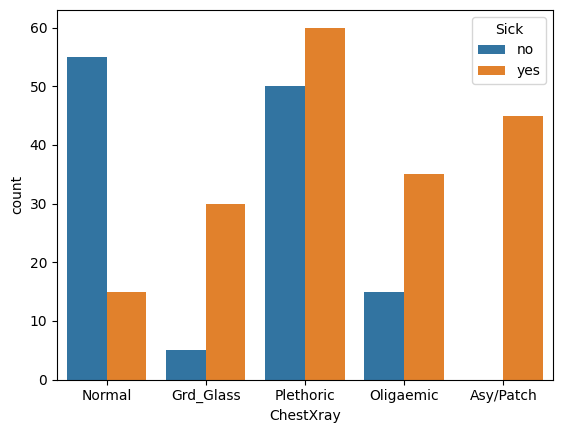

In [ ]:
normal_and_sick = f1[(f1['ChestXray'] == 'Normal') & (f1['Sick'] == 'Yes')]
print(len(normal_and_sick))

sns.countplot(data=f1, hue='Sick', x='ChestXray')

**Visualize the relation between LungParench and Disease**

<Axes: xlabel='LungParench', ylabel='count'>

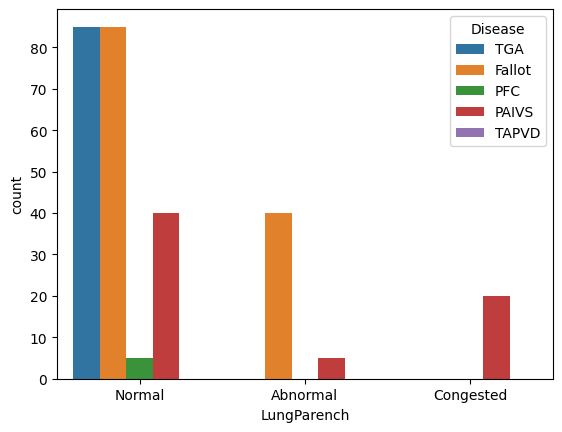

In [ ]:
sns.countplot(data=f1, hue='Disease', x='LungParench')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

def value_counts_categorical(f1):
  value_counts_dict = {}
  for column in f1.select_dtypes(include=["object"]):
    value_counts_dict[column] = f1[column].value_counts()
    f1[column] = label_enc.fit_transform(f1[column])
  return value_counts_dict

categorical_value_counts = value_counts_categorical(f1)

for column, counts in categorical_value_counts.items():
  print(f"Value counts for column '{column}':")
  print(counts)
  print("-------------------------------------------------")


Value counts for column 'BirthAsphyxia':
no     310
yes      5
Name: BirthAsphyxia, dtype: int64
-------------------------------------------------
Value counts for column 'HypDistrib':
Equal    315
Name: HypDistrib, dtype: int64
-------------------------------------------------
Value counts for column 'HypoxiaInO2':
Moderate    180
Severe      105
Mild         30
Name: HypoxiaInO2, dtype: int64
-------------------------------------------------
Value counts for column 'CO2':
Normal    245
Low        45
High       25
Name: CO2, dtype: int64
-------------------------------------------------
Value counts for column 'ChestXray':
Plethoric    110
Normal        70
Oligaemic     50
Asy/Patch     45
Grd_Glass     35
Name: ChestXray, dtype: int64
-------------------------------------------------
Value counts for column 'Grunting':
no     290
yes     25
Name: Grunting, dtype: int64
-------------------------------------------------
Value counts for column 'LVHreport':
no     220
yes     50
Name: L

<Axes: >

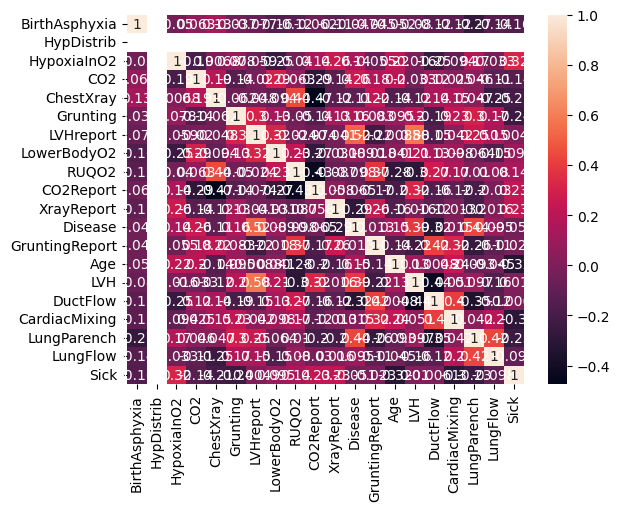

In [ ]:
sns.heatmap(f1.iloc[:,:].corr(),annot=True)

<Axes: >

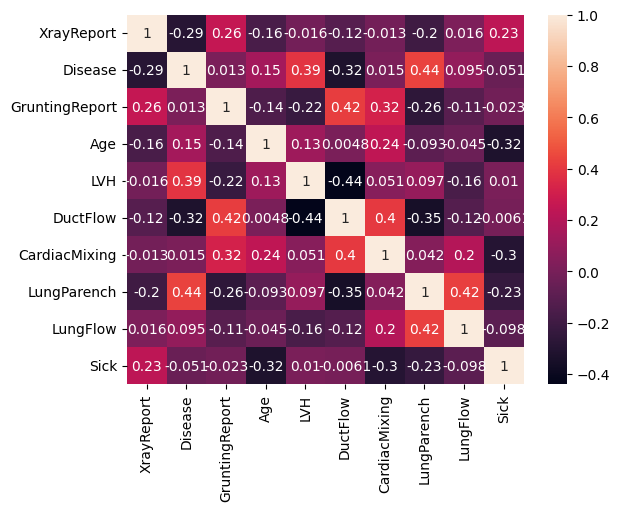

In [ ]:
sns.heatmap(f1.iloc[:,10:].corr(),annot=True)

**Duct flow and HypDistrib** are not required

In [ ]:
f1.drop(columns=['HypDistrib','DuctFlow'],inplace=True)

In [ ]:
f1

,BirthAsphyxia,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,CardiacMixing,LungParench,LungFlow,Sick
0,0,2,2,2,1,0,0,2,0,0,4,0,2,0,3,2,2,0
1,0,1,0,1,0,0,2,0,1,1,0,0,0,0,1,0,0,0
2,0,2,2,4,0,1,0,0,1,2,2,0,0,0,0,2,0,0
3,0,1,2,4,0,0,0,2,0,4,1,0,0,0,0,2,1,0
4,0,1,2,4,0,1,1,0,0,4,1,0,0,1,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,2,1,0,0,0,0,0,1,4,0,0,0,0,3,2,2,1
311,0,1,2,4,0,0,2,2,0,4,0,1,0,0,3,0,0,1
312,0,1,2,2,0,0,2,2,0,3,0,0,0,0,3,2,1,1
313,0,2,2,4,0,0,2,2,0,4,1,0,0,0,0,2,0,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1.iloc[:,:-1], f1.iloc[:,-1], train_size=0.8, random_state=1)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (252, 17)
y_train shape: (252,)
X_test shape: (63, 17)
y_test shape: (63,)


# Model_1

In [ ]:
class nn_class(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(17,30)
    self.l2 = nn.Linear(30,10)
    self.l3 = nn.Linear(10,1)

  def forward(self,x):
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    return x

classify = nn_class()
classify

nn_class(
  (l1): Linear(in_features=17, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
x_train = torch.FloatTensor(x_train.to_numpy())
x_test = torch.FloatTensor(x_test.to_numpy())
y_train = torch.FloatTensor(y_train.to_numpy())
y_test = torch.FloatTensor(y_test.to_numpy())

In [ ]:
loss_fxn = nn.BCEWithLogitsLoss()

optim1 = torch.optim.SGD(classify.parameters(),lr=0.4)

def accuracy(y1,y2):
  t = torch.eq(y1,y2).sum().item()
  return (t/len(y1))*100

**Problem Statement: To find whether the patient is sick or healthy using the provided data.**

In [ ]:
torch.manual_seed(42)

losses=[]

for epoch in range(1500):
    classify.train()

    y_logits = classify(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    loss = loss_fxn(y_logits,y_train)
    acc = accuracy(y_train,
                      y_pred)

    losses.append(loss)

    optim1.zero_grad()
    loss.backward()
    optim1.step()

    classify.eval()
    with torch.inference_mode():
        test_logits = classify(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fxn(test_logits,
                            y_test)
        test_acc = accuracy(y_test,
                               test_pred)
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.67308, Accuracy: 54.76% | Test loss: 0.65953, Test acc: 55.56%
Epoch: 30 | Loss: 0.40680, Accuracy: 88.10% | Test loss: 0.43312, Test acc: 84.13%
Epoch: 60 | Loss: 0.37863, Accuracy: 86.51% | Test loss: 0.40209, Test acc: 82.54%
Epoch: 90 | Loss: 0.35423, Accuracy: 86.51% | Test loss: 0.36796, Test acc: 82.54%
Epoch: 120 | Loss: 0.33259, Accuracy: 88.49% | Test loss: 0.33718, Test acc: 82.54%
Epoch: 150 | Loss: 0.31656, Accuracy: 88.49% | Test loss: 0.31516, Test acc: 82.54%
Epoch: 180 | Loss: 0.31582, Accuracy: 88.49% | Test loss: 0.29336, Test acc: 92.06%
Epoch: 210 | Loss: 0.46410, Accuracy: 82.54% | Test loss: 0.41708, Test acc: 84.13%
Epoch: 240 | Loss: 0.36621, Accuracy: 90.08% | Test loss: 0.35229, Test acc: 93.65%
Epoch: 270 | Loss: 0.48477, Accuracy: 74.60% | Test loss: 0.91899, Test acc: 80.95%
Epoch: 300 | Loss: 0.84224, Accuracy: 63.89% | Test loss: 1.03935, Test acc: 73.02%
Epoch: 330 | Loss: 0.87480, Accuracy: 63.10% | Test loss: 0.44765, Test acc: 92.0

#Model-2

In [ ]:
class nn_class(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(17,30)
    self.l2 = nn.Linear(30,1)


  def forward(self,x):
    x = self.l1(x)
    x = self.l2(x)
    return x

classify_2 = nn_class()
classify_2

nn_class(
  (l1): Linear(in_features=17, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
torch.manual_seed(42)

losses=[]

for epoch in range(1500):
    classify_2.train()

    y_logits = classify_2(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    loss = loss_fxn(y_logits,y_train)
    acc = accuracy(y_train,
                      y_pred)

    losses.append(loss)

    optim1.zero_grad()
    loss.backward()
    optim1.step()

    classify.eval()
    with torch.inference_mode():
        test_logits = classify_2(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fxn(test_logits,
                            y_test)
        test_acc = accuracy(y_test,
                               test_pred)
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 30 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 60 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 90 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 120 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 150 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 180 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 210 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 240 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 270 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 300 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.27%
Epoch: 330 | Loss: 0.83677, Accuracy: 51.19% | Test loss: 0.96613, Test acc: 41.2

# Out of Both Models, Model_1 performed well with 93.5 as Average Accuracy